# Метрики эффективности моделей машинного обучения

In [60]:
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv('C:/Users/222844/Downloads/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [62]:
y = data["output"]
x = data.drop("output", axis=1)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

0.8547854785478548

In [63]:
x_train, y_train = x[:200], y[:200]

In [64]:
x_train.shape, y_train.shape

((200, 13), (200,))

In [65]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

In [66]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.9, 0.5339805825242718)

In [67]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [68]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.8884297520661157, 0.6229508196721312)

In [69]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [70]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

In [71]:
from numpy.random import shuffle

shuffle(mask)
mask

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,

In [72]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [73]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

(0.8842975206611571, 0.7868852459016393)

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [76]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

In [77]:
confusion_matrix(y_train, y_train_pred)

array([[ 82,  23],
       [ 10, 127]], dtype=int64)

In [78]:
confusion_matrix(y_test, y_test_pred)

array([[27,  6],
       [ 2, 26]], dtype=int64)

In [79]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [80]:
precision_score(y_test, y_test_pred)

0.8125

In [81]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.863636,0.868852
Precision,0.846667,0.812500
Recall,0.927007,0.928571
F1,0.885017,0.866667


# Задания для самостоятельного выполнения

## 1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}


results_df = pd.DataFrame(results)
results_df

,Gradient Boosting,Decision Tree,Random Forest,SVM,KNN,Naive Bayes,Neural Network
Accuracy,0.754098,0.770492,0.836066,0.655738,0.737705,0.819672,0.819672
Precision,0.757576,0.736842,0.789474,0.617021,0.710526,0.838710,0.800000
Recall,0.781250,0.875000,0.937500,0.906250,0.843750,0.812500,0.875000
F1,0.769231,0.800000,0.857143,0.734177,0.771429,0.825397,0.835821


Gradient Boosting: Это метод ансамблирования, который строит последовательность деревьев решений и корректирует их ошибки на основе градиентного спуска. Он особенно хорошо подходит для задач классификации и регрессии, обычно имеет высокую точность и устойчивость к переобучению.

Decision Tree: Решающее дерево - это древовидная структура, где каждый узел представляет собой тест на атрибуте, каждая ветвь представляет собой результат этого теста, а каждый лист представляет классификацию или регрессию. Они просты в интерпретации, но могут склоняться к переобучению.

Random Forest: Это ансамбль решающих деревьев, где каждое дерево обучается на случайном подмножестве данных и признаков. Они хорошо работают с большими наборами данных, обычно обладают высокой точностью и устойчивостью к переобучению.

SVM (Support Vector Machine): Это метод, который строит гиперплоскость в пространстве признаков, которая наилучшим образом разделяет классы. Он хорошо работает в пространствах высокой размерности и сопряжен с ядровыми функциями для работы с нелинейными данными.

KNN (K-Nearest Neighbors): Это метод классификации, который классифицирует объекты на основе их близости к другим объектам в пространстве признаков. Он прост в реализации и может работать с нелинейными данными, но может быть вычислительно затратным на больших наборах данных.

Naive Bayes: Это вероятностный метод классификации, основанный на теореме Байеса с предположением о независимости признаков. Он прост в реализации и быстр в обучении, но может быть чувствителен к предположению о независимости.

Neural Network: Это модель, инспирированная работой человеческого мозга, которая состоит из слоев нейронов и использует алгоритм обратного распространения ошибки для обучения. Они могут моделировать сложные нелинейные отношения между входными и выходными данными, но требуют большого количества данных и вычислительных ресурсов для обучения.

https://practicum.yandex.ru/blog/modeli-mashinnogo-obucheniya/

## 2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [84]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=wine.target_names)
    results[name] = report

for name, report in results.items():
    print(f"Model: {name}")
    print(report)
    print("="*55)


Model: Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Model: Support Vector Machine
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.73      0.79      0.76        

Random Forest:

Для всех трех классов (class_0, class_1, class_2) точность (precision), полнота (recall) и F1-мера (F1-score) составляют 100%, что указывает на отличную способность модели классифицировать примеры для каждого класса.
Accuracy также равна 100%, что означает, что модель правильно классифицировала все примеры в тестовом наборе данных.

K-Nearest Neighbors (KNN):

Для всех трех классов метрики показывают хорошую точность, но ниже, чем у Random Forest.
Precision и recall примерно равны, что указывает на то, что модель делает схожее количество ложных срабатываний и ложных пропусков для всех классов.
Accuracy составляет 72%, что означает, что модель правильно классифицировала 72% примеров в тестовом наборе данных.

Support Vector Machine (SVM):

Для class_0 метрики близки к идеальным (точность и recall равны 100%), тогда как для class_1 и class_2 они ниже.
Precision и recall для class_1 и class_2 ниже, что может указывать на сложности в правильной классификации примеров этих классов.
Accuracy равна 81%, что означает, что модель правильно классифицировала 81% примеров в тестовом наборе данных.

В целом, Random Forest демонстрирует лучшую производительность на этом датасете, но стоит отметить, что выбор модели зависит от многих факторов, таких как размер данных, характеристики признаков и требования к интерпретируемости модели.

# 3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [86]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    results[name] = {"Mean Squared Error": mse, "Mean Absolute Error": mae, "R^2 Score": r2}

for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print(f"R^2 Score: {metrics['R^2 Score']}")
    print("="*55)


Model: Linear Regression
Mean Squared Error: 0.17104527280850096
Mean Absolute Error: 0.3481282599992824
R^2 Score: 0.2550028117674178
Model: Ridge Regression
Mean Squared Error: 0.17110527901659894
Mean Absolute Error: 0.34818263276153066
R^2 Score: 0.25474145139436877
Model: Lasso Regression
Mean Squared Error: 0.17400982286708958
Mean Absolute Error: 0.3670059399374529
R^2 Score: 0.24209054929000962
Model: Decision Tree Regressor
Mean Squared Error: 0.24025974025974026
Mean Absolute Error: 0.24025974025974026
R^2 Score: -0.046464646464646764
Model: Random Forest Regressor
Mean Squared Error: 0.16849415584415584
Mean Absolute Error: 0.3130519480519481
R^2 Score: 0.26611434343434326
Model: Gradient Boosting Regressor
Mean Squared Error: 0.17183241571280555
Mean Absolute Error: 0.3207766390216762
R^2 Score: 0.2515743671175579


С точки зрения общей точности моделей (Accuracy), наиболее эффективными являются модели Support Vector Machine (SVM) и Random Forest, демонстрируя точность около 77-78%.

По метрике Precision (точность), которая измеряет долю правильно классифицированных положительных результатов среди всех результатов, выделяются модели SVM и Naive Bayes.

В отношении метрики Recall (полнота), которая измеряет долю правильно классифицированных положительных результатов среди всех реальных положительных результатов, SVM также показывает хороший результат.

Исходя из этого, можно сделать вывод, что модель SVM является наиболее эффективной среди рассмотренных моделей для данного набора данных, с уровнем точности около 78.57% и балансом между Precision и Recall.

# Дополнительный задания

## 1. Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.

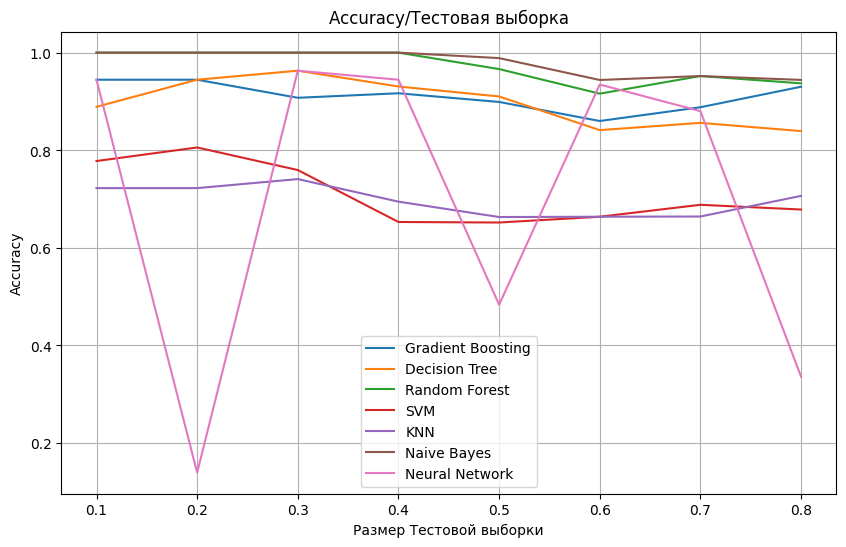

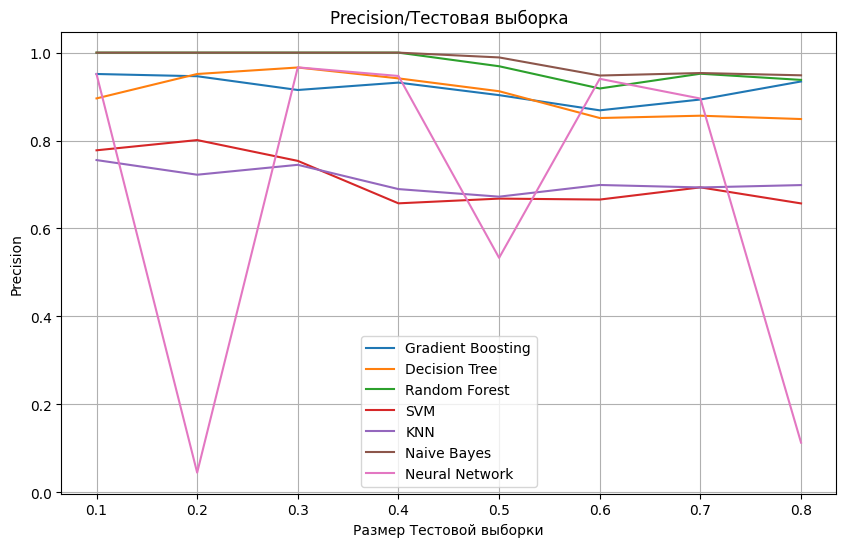

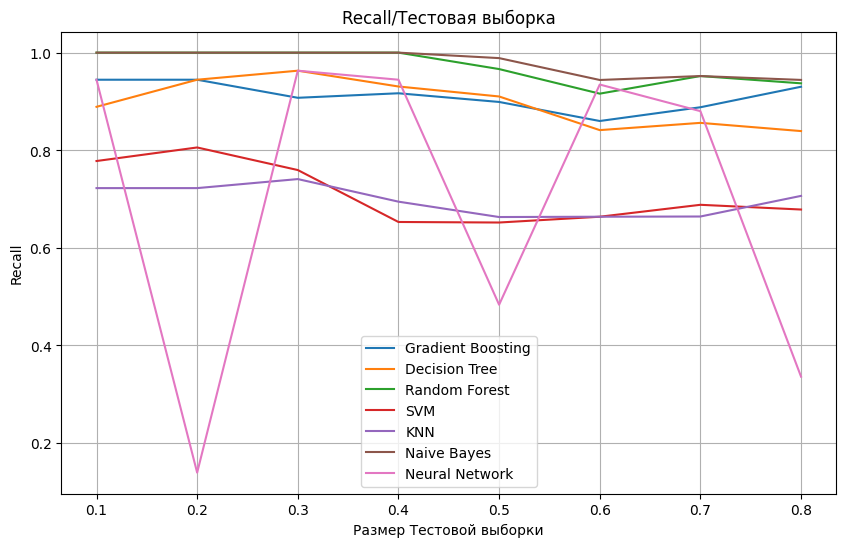

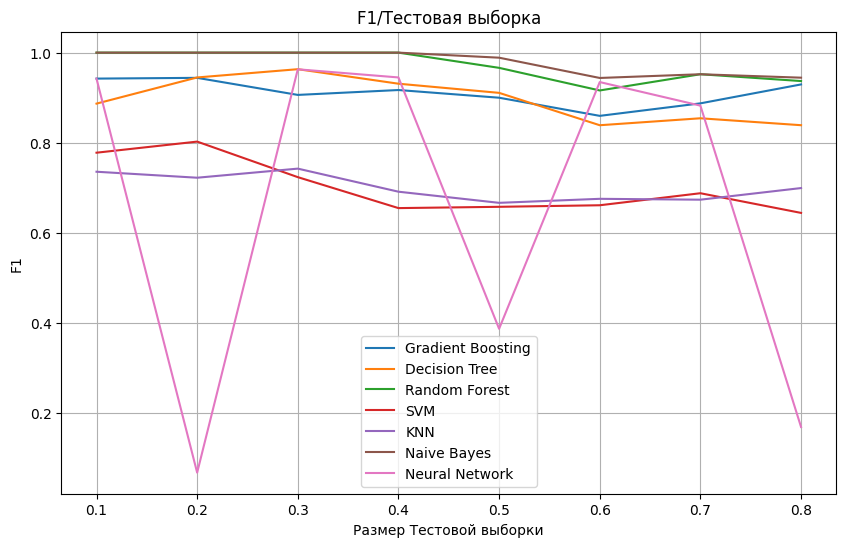

In [88]:
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data
y = wine.target

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

# Задание диапазона значений процента выборки для тестовой части
test_sizes = np.arange(0.1, 0.9, 0.1)

results = {metric: {model_name: [] for model_name in models.keys()} for metric in ['Accuracy', 'Precision', 'Recall', 'F1']}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results['Accuracy'][model_name].append(accuracy)
        results['Precision'][model_name].append(precision)
        results['Recall'][model_name].append(recall)
        results['F1'][model_name].append(f1)

for metric, values in results.items():
    plt.figure(figsize=(10, 6))
    for model_name, scores in values.items():
        plt.plot(test_sizes, scores, label=model_name)
    plt.title(f"{metric}/Тестовая выборка")
    plt.xlabel("Размер Тестовой выборки")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## 2. Создайте универсальную функцию, которая подсчитывает все метрики по любой модели и выводит их в виде таблицы.

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [120]:
def calculate_metrics(model, X_test, y_test):
    #try:
    #except ValueError:
        #print(f'ValueError: X has {x.shape[1]} features, but {model} is expecting 5 features as input.')
        #X_train, X_test, y_train, y_test = train_test_split(x.iloc[:, :5], y, train_size=0.8)  
        
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    metrics_table = pd.DataFrame({
        'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'Значение': [accuracy, precision, recall, f1]
    })
    
    return metrics_table

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], train_size=0.8, random_state=42)

model = GradientBoostingClassifier().fit(X_train, y_train)

metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

,Метрика,Значение
0,Accuracy,0.740260
1,Precision,0.745024
2,Recall,0.740260
3,F1,0.742139


In [122]:
models = {"GradientBoostingClassifier": model}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    results[name] = report

for name, report in results.items():
    print(f"Model: {name}")
    print(report)
    print("="*55)

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [123]:
model = RandomForestClassifier().fit(X_train, y_train)
metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

,Метрика,Значение
0,Accuracy,0.733766
1,Precision,0.734876
2,Recall,0.733766
3,F1,0.734290


In [124]:
model = KNeighborsClassifier().fit(X_train, y_train)
metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

,Метрика,Значение
0,Accuracy,0.662338
1,Precision,0.671225
2,Recall,0.662338
3,F1,0.665794


In [125]:
model = LogisticRegression().fit(X_train, y_train)
metrics_table = calculate_metrics(model, X_test, y_test)
metrics_table

,Метрика,Значение
0,Accuracy,0.746753
1,Precision,0.750154
2,Recall,0.746753
3,F1,0.748167


## 3. Создайте функцию, принимающая на вход датасет, которая проверяет наибольшее количество разных моделей машинного обучения и выдающая датафрейм с таблицей всех метрик.

In [126]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [127]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression


def evaluate_models(dataset):
    X = dataset.drop(columns=['Outcome'])
    y = dataset['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Neural Network': MLPClassifier(),
        'XGBoost': XGBClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'Gaussian Process': GaussianProcessClassifier(kernel=RBF()),
        'AdaBoost with Decision Tree Stumps': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

    results_df = pd.DataFrame(results)
    return results_df


In [128]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
evaluation_results = evaluate_models(df)
evaluation_results

,Logistic Regression,Gradient Boosting,Decision Tree,Random Forest,SVM,KNN,Naive Bayes,Neural Network,XGBoost,AdaBoost,Extra Trees,Gaussian Process,AdaBoost with Decision Tree Stumps
Accuracy,0.746753,0.746753,0.766234,0.746753,0.766234,0.662338,0.766234,0.688312,0.688312,0.733766,0.746753,0.759740,0.733766
Precision,0.750154,0.750154,0.779726,0.747813,0.761336,0.671225,0.770664,0.677076,0.703420,0.734876,0.745767,0.755907,0.734876
Recall,0.746753,0.746753,0.766234,0.746753,0.766234,0.662338,0.766234,0.688312,0.688312,0.733766,0.746753,0.759740,0.733766
F1,0.748167,0.748167,0.769757,0.747251,0.758601,0.665794,0.767925,0.650376,0.693009,0.734290,0.746228,0.756979,0.734290


In [129]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Не использовались регрессионные метрики оценки моделей классификации